In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.basics import *

import h5py as h5py
import matplotlib.pyplot as plt
import numpy as np

import jkbc.utils.general as g
import jkbc.utils.files as f
import jkbc.utils.metrics as metric
import jkbc.utils.postprocessing as pop
import jkbc.utils.preprocessing as prep
import jkbc.utils.bonito.data as bonito


In [4]:
def get_signal_data(index, filename = '../../../mapped_reads/mapped_reads.hdf5'):
    sc = prep.SignalCollection(filename)
    read_id = sc.read_idx[index]
    print(f"Processing {read_id} ({index})")
    with h5py.File(filename, 'r') as f:
        read = f['Reads'][read_id]
        return bonito.scale_and_align(read)
    
def convert_to_relative(lst):
    new_lst = []
    prev = 0
    for x in lst[1:]:
        new_lst.append(x-prev)
        prev = x
    return new_lst

In [5]:
all_data = []
original = []
for x in range(10):
    signal, ref_to_signal, reference = get_signal_data(x)
    relative = convert_to_relative(ref_to_signal)
    all_data.append(relative)
    original.append(ref_to_signal)

Processing 00003bc2-72ba-41f8-8221-c015242b6010 (0)
Processing 00004996-476d-488f-8f5f-868e6b710e44 (1)
Processing 00005dcf-a498-42f5-a48d-5df304058d1b (2)
Processing 00007439-48c8-4069-8891-c1ae1246671f (3)
Processing 0000b441-4cc6-42a7-bdfe-310f9e560e57 (4)
Processing 0000d1b9-a0bb-45f8-9f35-dfac58a3505e (5)
Processing 0000dad4-3cee-4659-aa19-5ded640fde47 (6)
Processing 0000f3a9-a26b-4f08-ae81-2351d0fbb22b (7)
Processing 00010247-f0e5-4c5d-932a-73e85c0ee34d (8)
Processing 00012799-5c16-4c88-8ba6-419900f7a181 (9)


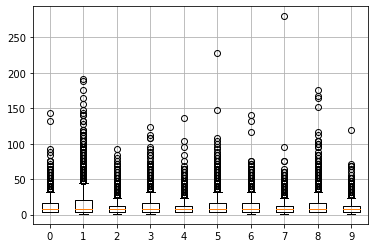

In [16]:
plt.gca().set_prop_cycle(None)
plt.boxplot(all_data, labels=range(len(all_data)))
plt.grid(True)
plt.savefig('images/ref_to_signal_variance.png', dpi=600)

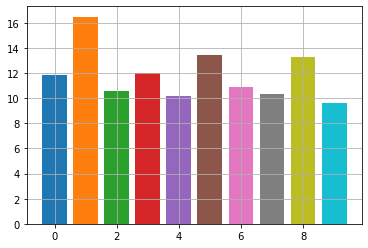

In [20]:
plt.gca().set_prop_cycle(None)
bar = [np.average(x) for x in all_data]
plt.bar(range(len(original)), bar, color=plt.rcParams['axes.prop_cycle'].by_key()['color'])
plt.grid(True)
plt.savefig('images/ref_to_signal_gradient_bar.png', dpi=600)

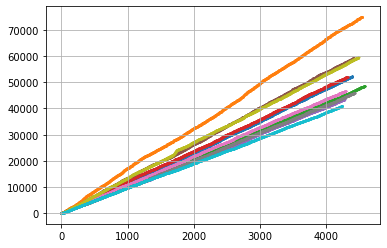

In [19]:
plt.gca().set_prop_cycle(None)
for y in original:
    s = np.array(y).fill(0)
    x = range(len(y))
    p = plt.scatter(x, y, sizes=s)
plt.grid(True)
plt.savefig('images/ref_to_signal.png', dpi=600)

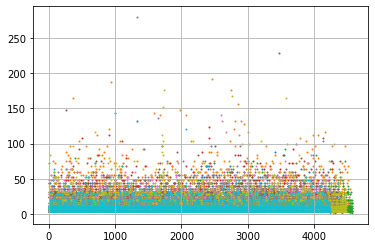

In [18]:
plt.gca().set_prop_cycle(None)
s = np.array(all_data).fill(2)
for x in all_data:
    s = np.array(x).fill(1000)
    plt.scatter(range(len(x)), x, sizes=s)
plt.grid(True)
plt.savefig('images/ref_to_signal_gradients.png', dpi=600)